# CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project

### Table of Contents

1. [Abstract](##Abstract)
2. [Data Detail](##Data)
3. [Load Data](##Load)
4. [Data Processing and Analysis](##DataP)
    - 4.1 [Data Cleaning](###DataC)
    - 4.2 [Data Encoding](###DataE)
    - 4.3 [Exploratory Data Analysis (EDA)](###Exploratory)
5. [Model](##data_modelling)
    - 5.1 [Unsupervised Models](###Unsupervised_Models)
        -5.1.1 [Unsupervised Model 1: Agglomerative Cluster](###Unsupervised_Model_1)
        -5.1.2 [Unsupervised Model 2: DBSCAN](###Unsupervised_Model_2)
    - 5.2 [Supervised Models](##sl)
6. [Results and Analsyis](##Results)
7. [Discussion and Conclusion](##Discussion)
8. [GitHub Repository](##Github)
9. [References](##references)

## 1. Abstract <a class="anchor" id="abstract"></a>

In the field of marketing, accurately segmenting customer groups is key to optimizing the efficiency of advertising budgets. This process helps ensure that every dollar spent on advertising yields a higher return for the company. I have selected a dataset provided by Analytics Vidhya through a hackathon, which includes features that allow me to segment customers into four distinct categories. Although the training set in this dataset includes labels, I will treat this task as an unsupervised learning attempt, using multiple unsupervised learning algorithms to build models. The goal is to evaluate the effectiveness of unsupervised methods for customer segmentation and compare them with traditional supervised learning models to identify the best approach.

The aim of this study is to develop a precise and efficient customer segmentation model that enables companies to allocate their advertising budgets more effectively, making every dollar spent more impactful in reaching target customers. Through this analysis, I hope to uncover new ways to optimize advertising expenditure, further enhancing the return on investment and supporting company profit growth.

## 2. Data Detail<a class="anchor" id="abstract"></a>

**Reference**<br>
As noted earlier, the dataset was collected from Kaggle. However, the provenance of the data is Analytics Vidhya. There is no additional information on how the data was obtained.

APA Citation:
<br>
Analytics Vidhya. (n.d.). JanataHack customer segmentation: Problem statement. Analytics Vidhya. https://www.analyticsvidhya.com/datahack/contest/janatahack-customer-segmentation/#ProblemStatement

**Kaggle Dataset**: https://www.kaggle.com/datasets/vetrirah/customer/data

**Kaggle Dataset Title**: *Customer Segmentation*

**Data Description**<br>
- Format: tabulated data<br>
- Training Data size: 8068 samples<br>
- Feature size: 9 features, 1 target variable (Segmentation), and 1 ID column<br>
- Features: ID column will be dropped as it will not add value to segmenting customers

**Description of Features**

Outlined below is the list of variables included in the raw data. Excluding the ID column, there are 9 features followed by the Segmentation, target variable. I will remove ID and Segmentation for the purposes of our unsupervised learning techniques. I will then later produce a few models with supervised learning to compare the performance against each other. The reason unsupervised learning approach is important, many times, we may not know who our customers are. We would need to segment customers based on available data to be able to make an effective data-driven marketing campaign.

|Index|Feature Name    |Description|
|:-   |:-|:-|
|0    |ID               |Customer ID       
|1    |Gender           |Gender of customer
|2    |Ever_Married     |Customer marital status     
|3    |Age              |Customer age
|4    |Graduated        |Whether customer graduated
|5    |Profession       |Customer profession
|6    |Work_Experience  |Customer work experience in years
|7    |Spending_Score   |Customer spending score
|8    |Family Size      |Number of family member a customer has (includes customer themselves)
|9    |Var_1            |Anonymized category for the customer
|10   |Segmentation     |Customer segment (target variable)

## 3. Load Data <a class="anchor" id="abstract"></a>

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from summarytools import dfSummary
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone 
from sklearn import tree
import matplotlib.pylab as plt 
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

In [3]:
# load data
df_train, df_test, df_sample = pd.read_csv("Train.csv"), pd.read_csv("Test.csv"), pd.read_csv("sample_submission.csv")
# print first 5 rows to get a sense of the data structure
df_train.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
# print first 5 rows to get a sense of the data structure
df_test.head(20)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


In [5]:
# below is just a reference of how data was submitted ot hackathon to compete, 
# we won't be using this data as we cannot submit it since the hackathon is over
df_sample.head(20)

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A
5,459003,A
6,459005,A
7,459008,A
8,459013,A
9,459014,A


## 4. Data Processing and Analysis<a class="anchor" id="abstract"></a>

### 4.1 Data Cleaning

**How and why I cleaned the data**: <br>
Before I can do exploratory data analysis (EDA), I must first ensure our data is clean and ready to be analyzed. As a first step, I explored whether there are any values that contian **blanks or null values**. It turns out gender, graduated, profession, work_experience, family_size, and Var_1 all have missing values. The number of missing values is relatively small (in the hundreds) compared to the sample training size we have which is in the thousands. Therefore, I will remove the entire rows of each of these missing features rather than estimating or interpreting them to maintain such rows. These missing values along with the ID column will create noise in our EDA step and issues when we get to creating our models. Therefore, we will **drop ID column** completely as it does not add value in our segmentation exercise and remove rows containing missing values from the aforementioned features. We will also **drop this feature**.
<br><br>
Additionally, I noticed several features are objects. They need to be encoded to be used in the models. Thus, I have encoded each of the features that appeared to be objects and encoded them appropriately ahead of EDA step.
<br><br>
**Conclusions / discussions**: <br>
In summary, I removed the id column as it does not add value to predicting whether a customer should belong to a specific segment. I have also removed all rows that have missing data. Additionally, I have actioned data type **munging** on the target variable (e.g., "Segmentation") to ensure it is integer and not string. Previously, the data type was object for this variable. I have also encoded the features that were object types into boolean form leveraging `get_dummies` function.
<br><br>
**Visualizations**: <br>
What follows is visualizations of the data followed by the specific cleaning steps exercised as discussed in the aforementioned sections. I visualized the data leveraging a helpful function called `dfSummary` to check for null values before removing them. Once removed, I checked to ensure it was properly removed. Further, I checked the data types and ensured the object target variable was appropriately converted to integer so we can compare the results easier. Additionally, I visualized the data for imbalances by creating a countplot via seaborn library to illustrate that the data is relatively balanced visually and also included the counts above the chart as reference. The outliers were visually reviewed via a pairplot through the seaborn library. Lastly, I noticed in the data step, when I printed the head of the data the features would likely not need to be normalized amongst each other as they are similar in terms of their ranges.

In [6]:
# Make a copy of the df in case we need to revert back
df_clean = df_train.copy()

# Check for unique values to ensure only 2 variables within column
print("=== Unique Values in 'Segmentation' Column ===")
print(df_clean['Segmentation'].unique())
print("\n----------------------------------------")

# Re-map each variable to 1 - malignant and 0 - benign
df_clean['Segmentation'] = df_clean['Segmentation'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4})

# Display first 5 entries in Segmentation column
print("=== First 5 Values in 'Segmentation' Column ===")
print(df_clean['Segmentation'].head(5).to_string(index=False))
print("\n----------------------------------------")

# Display last 5 entries in Segmentation column
print("=== Last 5 Values in 'Segmentation' Column ===")
print(df_clean['Segmentation'].tail(5).to_string(index=False))
print("\n========================================\n")

=== Unique Values in 'Segmentation' Column ===
['D' 'A' 'B' 'C']

----------------------------------------
=== First 5 Values in 'Segmentation' Column ===
4
1
2
2
1

----------------------------------------
=== Last 5 Values in 'Segmentation' Column ===
4
4
4
2
2




In [7]:
# summarize all the columns and get a sense of their distribution via mini historgrams
dfSummary(df_clean)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 463479.2 (2595.4)min < med < max:458982.0 < 463472.5 < 467974.0IQR (CV) : 4503.5 (178.6),"8,068 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABPElEQVR4nO3WsU3EMBhAYYOQksK0uYIGeYFjgZuAigncMlO6TEDHBuxBQ0HqNJEihQHgJFsiAd17X/3L+Z0Xne5qXdegy3f91wtoHzd7P7DruqcY46Fkdpqm+xjje+Hs5ziOLxvsUHxurT33OBt6qyVijIec80fJ7DAMp5zzW8ls3/ePKaWifdu2PeacXwt3uCuZC6HundXuUXO/n3qcDV0TpGaJZVmOIYSic2s0TXNb8wGVnjvP80NK6blktiZc7R6V9/v2cf7KT/dWL/k/uJS7+WcMwtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0xBe9K2Lyg7v7zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[object],1. Male2. Female,"4,417 (54.7%)3,651 (45.3%)",,0(0.0%)
3,Ever_Married[object],1. Yes2. No3. nan,"4,643 (57.5%)3,285 (40.7%)140 (1.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAAwCAYAAAAfHSRCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAAA20lEQVR4nO3ZsQkDMQxA0fhIqdZckakygWfzBJkqRVy7d6pkAHMgPvw3geCDDFZZa93EVGqtz4g4swfJMuf8jDFe2XPsuEfE2Vp7Zw+Spff+yJ5h15E9gPYZD8x4YMYDMx6Y8cCMB2Y8MOOBGQ/MeGB+TIM/posnIS7XJhhybZJX3ZWQ9zzyDe5Krk0w44EZD8x4YMYDMx6Y8cCMB2Y8MOOBGQ/Mj2kw73lgrk2w/9p0FfEcv3se7d2TaxPNeGDGAzMemPHAjAdmPDDjgRkPzHhgxgPzYxrMex7YF1rBRysxmNLJAAAAAElFTkSuQmCC"">",140(1.7%)
4,Age[int64],Mean (sd) : 43.5 (16.7)min < med < max:18.0 < 40.0 < 89.0IQR (CV) : 23.0 (2.6),67 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABVklEQVR4nO3csW2DQBSH8UtkCYpLiwt3LOAskCEywbVZiwnSeSMXpqZBQiILxM49+flw7v/96pNB+sQ7LLBf1nUNqN/r1ieAMnYeH9J13WeMcZ+zdpqmyziO3x7HRT6X0DHGfUrpnLN2GIaDxzFhw+gWQWgRLqPbYp7n977vv3LWsp/7KR66aZo39vPyGN0iCC2i+Oi2YD/389Sh2c/9MLpFPPUVbcGYv62a0Iz52xjdIggt4urotjx6XJblGELIGpvYxtXQxkePH36nhEdgdIsgtAhCiyC0CEKLILQIQosgtAhCiyC0CEKLILSIal48sFB8G0UytOLbKIxuEYQWITm6LWrZzwn9h1r2c0I7slz9IZSdAIR2ZLn6Qyg7AbgZE0FoEYQWwR79T9z7X26E3pDlLr1t22NK6ZSz9rebPEJvyPgd/a5fw7BHiyC0CEKLILQIQov4AW9ziKgUOM1aAAAAAElFTkSuQmCC"">",0(0.0%)
5,Graduated[object],1. Yes2. No3. nan,"4,968 (61.6%)3,022 (37.5%)78 (1.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAAwCAYAAAAfHSRCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAAA5ElEQVR4nO3ZsQnDMBBAUSmoVCtceCpPoNk8QaZKYdXqlQUMCS4sf/hvgoMPJ9DFMUYQUyylbDnnZfYgT9J7P1pr79lz/JJyzkut9TN7kCfZ932dPcM/XrMH0HXGAzMemPHAjAdmPDDjgRkPzHhgxgMzHpgf0ycoH9PRkxCXaxMMszYpq+xOmHse5cZ2J9cmmPHAjAdmPDDjgRkPzHhgxgMzHpjxwIwH5sc0mPc8MNcmWCylbCGE4EriSYT3Tudcm2DGAzMemPHAjAdmPDDjgRkPzHhgxgMzHljqvR+zh9A13vPAvjNiPLt9pBs2AAAAAElFTkSuQmCC"">",78(1.0%)
6,Profession[object],1. Artist2. Healthcare3. Entertainment4. Engineer5. Doctor6. Lawyer7. Executive8. Marketing9. Homemaker10. nan,"2,516 (31.2%)1,332 (16.5%)949 (11.8%)699 (8.7%)688 (8.5%)623 (7.7%)599 (7.4%)292 (3.6%)246 (3.0%)124 (1.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACjCAYAAACE70CvAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAACKElEQVR4nO3dMWoCURhG0WdIOa2kyKqyAtfmCrKqFLG2N1UCYuEgknkXzlnBwIWveL/g7nK5DJpetv4AHidemHhh4oWJFyZe2G6/338sy/K29YeMMcb5fP4+nU6fW39HxeuyLG+Hw+Fr6w8ZY4zj8fi+9TeUmM0w8cLECxMvTLww8cLECxMvTLww8cK8bYbt/Ialy2yGPW02Td7/e9pJyDnn/5nNMPHCxAsTL0y8MPHCxAsTL0y8MPHCxAvzMB3mnhdmNsMemk0TOYeH7nlud3Mwm2HihYkXJl6YeGHihYkXJl6YeGHihXnbDHMSCjObYatn01TOZ/VJyBloPmYzTLww8cLECxMvTLww8cLECxMvTLwwb5thTkJhZjPMbIY5CYWZzTDxwsQLEy9MvDDxwsQLEy9MvDDxwrxthjkJhZnNsFWzaTLntOok5Bw0J7MZJl6YeGHihYkXJl6YeGHihYkXJl6Yt80wJ6Ewsxl2dzZN5rzunoScg+ZlNsPECxMvTLww8cLECxMvTLww8cLEC/O2GeYkFGY2w25m00x2

#### Dropping all NaN values

In [9]:
# drop missing values
df_clean = df_clean.dropna()
dfSummary(df_clean)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 463519.8 (2566.4)min < med < max:458982.0 < 463575.0 < 467974.0IQR (CV) : 4392.0 (180.6),"6,665 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABUklEQVR4nO3YMU7DMBiG4R+ElAxmTQcWlAuUC/QQnMAr1/IJ2LgB92BhILOXSJHCASBgq23i+Huf2bLcvvGfqjfzPBvqd7v1AbCOu60P8Jeu656dc4eUtTHGr2EYXrfct2RFh3bOHbz3nylrQwgPW+9bstVD59ymaZqOZpYUpAQ5n83MLMb46Jz7SFx71mRZPXTmbTpd+zz/Gcfxqe/7l5S1bdsevfdvqXuHEE7e+/fEtWdNlouErvmWNk1zv6cHc8lFQu/tlu5RzmT5bcwX/WMsR84XsbepYpY9WX6M+WpC1zJir2UxdM3vXUWLoXnv1oW/QEUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaBKFFEFoEoUUQWsQ3+jFvPWHFTdsAAAAASUVORK5CYII="">",0(0.0%)
2,Gender[object],1. Male2. Female,"3,677 (55.2%)2,988 (44.8%)",,0(0.0%)
3,Ever_Married[object],1. Yes2. No,"3,944 (59.2%)2,721 (40.8%)",,0(0.0%)
4,Age[int64],Mean (sd) : 43.5 (16.5)min < med < max:18.0 < 41.0 < 89.0IQR (CV) : 22.0 (2.6),67 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABYElEQVR4nO3csU3DQBSH8QMh2cXROgXdLRAWYAIqJriWmdx5Ajo2osC1G0uWzAJJuKc8zsH/71dbiaUveXeJndyt6xqwf/dbnwDqePB4kK7r3mKMh5Jjp2n6Hsfxw+N5Uc4ldIzxkHP+Kjl2GIYnj+eEDaNbhMs72mKe5+eU0nvJsYx5P9VDN03zyJivj9EtgtAiqo9uC9ZzPzcdmvXcD6NbxE2/oy0Y85ftJjRj/jJGtwhCiyC0CEKLOLsZs1xjXpblGEIo2ghhG2dDG68xv/idEv4Co1sEoUUQWgShRRBaBKFFEFoEoUUQWgShRRBaxG7uMLFQvO1IMrTibUeMbhGEFiE5ui32sp4T+heW9bzv+9eUUtFdOSHUfWEQ2pHlRRFC3Y0ea7QIQosgtAhCi2Az9k9c+19uhN6Q5TN627bHnPNnybGndvOE3pDxO/erfiTBGi2C0CIILYLQIggt4gfS1IVVSNnJGgAAAABJRU5ErkJggg=="">",0(0.0%)
5,Graduated[object],1. Yes2. No,"4,249 (63.8%)2,416 (36.2%)",,0(0.0%)
6,Profession[object],1. Artist2. Healthcare3. Entertainment4. Doctor5. Engineer6. Executive7. Lawyer8. Marketing9. Homemaker,"2,192 (32.9%)1,077 (16.2%)809 (12.1%)592 (8.9%)582 (8.7%)505 (7.6%)500 (7.5%)233 (3.5%)175 (2.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAACSCAYAAABLyZSnAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAAB6klEQVR4nO3asW3CUBhG0ThK6RZRMFUmYDYmyFQpQu3eaUEUIIR4vtI5E1i60le839O6rh80fY7+AJ4nXph4YeKFiRc27Xa773me96M/5NKyLH/n8/ln9Hds3dc8z/vj8fg7+kMunU6nw+hvKDCbYeKFiRcmXph4YeKFiRcmXph4YeKFedsMm/wG0WU2w142m6bu/V52EnLGeT+zGSZemHhh4oWJFyZemHhh4oWJFyZemLfNMCehMLMZ9vRsmsnxnj4JOQGNZzbDxAsTL0y8MPHCxAsTL0y8MPHCxAvzthnmJBRmNsMenk0zuT0Pn4ScgLbHbIaJFyZemHhh4oWJFyZemHhh4oWJFyZemIfpMPe8MLMZZjbD3PPCzGaYeGHihYkXJl6YeGHihYkXJl6YeGHeNsOchMLMZtjd2TSX23X3JOQUtF1mM0y8MPHCxAsTL0y8MPHCxAsTL0y8MG+bYU5CYWYzzGyGOQmFmc0w8cLECxMvTLww8cLECxMvTLww8cK8bYY5CYWZzbCb2TSTHTcnISegDrMZJl6YeGHihYkXJl6YeGHihYkXJl6Yt80wJ6Ewsxl2NZsms+XqJOQc1GI2w8QLEy9MvDDxwsQLEy9MvDDxwsQL87YZ5iQUZjbDxAsTL0y8MPHC/gEVL9TaWizmgwAAAABJRU5ErkJggg=="">",0(0.0%)
7,Work_Experience[float64],Mean (sd) : 2.6 (3.4)min < med < max:0.0 < 1.0 < 14.0IQR (CV) : 4.0 (0.8),15 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAAsTAAALEwEAmpwYAAABPUlEQVR4nO3csU3EMBhA4YCQ0pg2V9AgLwALMAEVE7hlpnSZgCnYg4aC1G4iRcotQCRHZ47Lvfe1Z1lW3q9cKt8sy9Lo+t3+9wF0HndrP3Rd9xZCOJRsknP+Gcfxo96xVNtq6BDCIaX0XbLJMAwP9Y6kv+CrG8LQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQ6xeKHfNiLcinj30JTzkLbci9n3/GmPc/VCcPfTerp5s2/Z+T+ddUyX0NE3PMcb3krXzPD81TVP04FRPldAbp/6ldN8tA5RzfgwhfJWsJQ7bRX+MbR2glNJn6drTTva7LYPZNNv+00/9tjkChpRnlY+b20YAAAAASUVORK5CYII="">",0(0.0%)
8,Spending_Score[object],1. Low2. Average3. High,"3,999 (60.0%)1,662 (24.9%)1,004 (15.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAA

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 624.8+ KB


### 4.2 Data Encoding
To encode the variables I leveraged `get_dummies` for the variables that were object types. This created new features in boolean form. This means `True` or `False`. The way to interpret this would be if Gender_Male is `True` then the customer is a "Male", however, if it is `False` the customer is a 'Female'. After which, I converted the dummies into integers 0 - False, 1 - True as a preprocessing step for model step.

In [8]:
# One-hot encode specified columns and drop the 'ID' column
df_encoded = pd.get_dummies(df_clean, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'], drop_first=True)
df_encoded = df_encoded.drop(columns=['ID'])

# Display DataFrame information with formatted output
print("=== DataFrame Information After Encoding ===\n")
print(df_encoded.info())
print("\n=== Summary of Encoded DataFrame Columns ===")
print(f"Total Columns: {len(df_encoded.columns)}")
print("Encoded Columns:", list(df_encoded.columns))
print("\n==========================================\n")


=== DataFrame Information After Encoding ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       8068 non-null   int64  
 1   Work_Experience           7239 non-null   float64
 2   Family_Size               7733 non-null   float64
 3   Segmentation              8068 non-null   int64  
 4   Gender_Male               8068 non-null   bool   
 5   Ever_Married_Yes          8068 non-null   bool   
 6   Graduated_Yes             8068 non-null   bool   
 7   Profession_Doctor         8068 non-null   bool   
 8   Profession_Engineer       8068 non-null   bool   
 9   Profession_Entertainment  8068 non-null   bool   
 10  Profession_Executive      8068 non-null   bool   
 11  Profession_Healthcare     8068 non-null   bool   
 12  Profession_Homemaker      8068 non-null   bool   
 13  Profession_Lawyer

### 4.3 Exploratory Data Analysis

**Feature description that make up the dataset**: <br>
I checked for **imbalances** within the target variable via countplot and **outliers** via boxplot for the features that were continuous in the dataset to better understand whether we need to be concerned about implementing techniques that are specific for imbalanced data or treatment of outliers. Turns out, the four segments in the trianing set is relatively balanced. Therefore, I won't worry about class imbalances. Equally important, I ran boxplots against continuous features within the data set to visually inspect for outliers. Looks like there are some for age, work experience, and family size. However, I decided to leave them in for now in case it helps explains the clusters or customer segmentation. Lastly, I ran countplots on boolean variables that I have encoded from the prior step to understand their distribution. At first glance, there are imbalances amongst these features, however, recall that these are boolean encoded. Therefore, they are actually relatively balanced. An easier way to see this is to run the historgram against profession on the unencoded dataset which I have done as well below. One thing to note is Artist profession is heavily represented over the other professions in the dataset.
<br><br>
**Description of correlations between different factors of the dataset**
There seems to be several moderately strong positive correlations between features of the dataset. For example, age seems to be moderately positively correlated amongst high spending score, lawyer profession, and married customers. Conversely, age seems to be moderately negatively correlated amongst lower spending score, healthcare profession, and family size. This can visually be seen by the heatmap I created from the seagate library. I considered moderately correlated items that were between .3 and .6. Those that have a negative sign would be considered negatively correlated while those with positive are postively correlated.
<br><br>
**Transformation requirements for data**
The boolean data is True or False. Therefore no scaling is required there. However, the 4 continuous features will require scaling before we jump into the model step. For example, age goes all the way up to over 90. If we don't normalize this, we may see poor model performance. The other 3 are not vastly out of range, but we will benefit from scaling them as well. Especially work experience.
<br><br>
**Hypothesis for data transformation**
Given most of our data is boolean I am leaning towards min-max scale. However, I would like to see the performance of sklearns built in `StandardScaler()` which leverages z-score normalization method.
<br><br>
**Outlier analysis**
As described in the feature description section, my data has several outliers in the continuous features including age, work experience, and family size. I also noticed the Artist profession seems to be dominating in sample size compared to the other professions in the dataset. We will maintain all outliers to see how models perform without removing them as they could help explain customer segmentation with the outliers intact. Other data cleaning techniques and approach was described in the aforementioned section in detail.
<br><br>
**Feature importance hypothesis**
Based on EDA I beleive profession, spend, age, gender and marital status would be important features in detemrining customer segmentation. My intuition leads me to beleive that a profession that pays more such as Executive and their spending habbits being higher than others will bucket this group together vs. those that spend less. Marital status may impact the customers sending habits as they likely have more folks to care for. Intuitively, age will group folks within their age group. They must have similar interest within a similar generation.

=== Counts of Each Category in 'Segmentation' Column ===
Segmentation
4    2268
1    1972
3    1970
2    1858
Name: count, dtype: int64

----------------------------------------



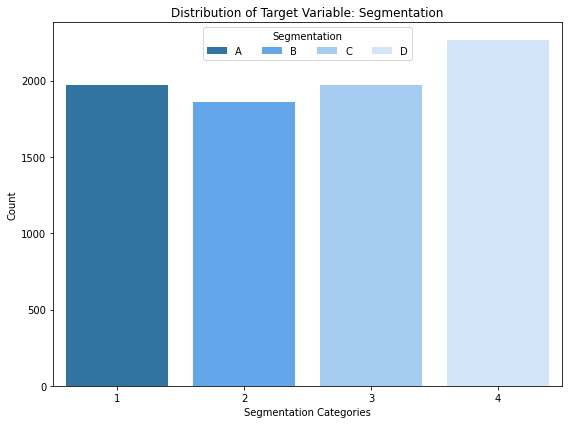

In [9]:
# Check for data imbalance by counting unique values in the target variable
print("=== Counts of Each Category in 'Segmentation' Column ===")
print(df_clean['Segmentation'].value_counts())
print("\n----------------------------------------\n")

# Plot count plot for 'Segmentation'
plt.figure(figsize=(8, 6))
blue_palette = ['#1f77b4', '#4da6ff', '#99ccff', '#cce5ff']  # Blue color palette
sns.countplot(x='Segmentation', data=df_clean, hue='Segmentation', palette=blue_palette)

# Add titles and labels
plt.title('Distribution of Target Variable: Segmentation')
plt.xlabel('Segmentation Categories')
plt.ylabel('Count')
plt.legend(title='Segmentation', labels=['A', 'B', 'C', 'D'], loc='upper center', ncol=4)

# Customize x-axis ticks and layout
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Data Visualization of Features
Since a lot of my data is boolean form, boxplots don't make a lot of sense here as they are more suited for continuous data. I will create countplots for each of the features instead as shown below to get a sense of the distributions.

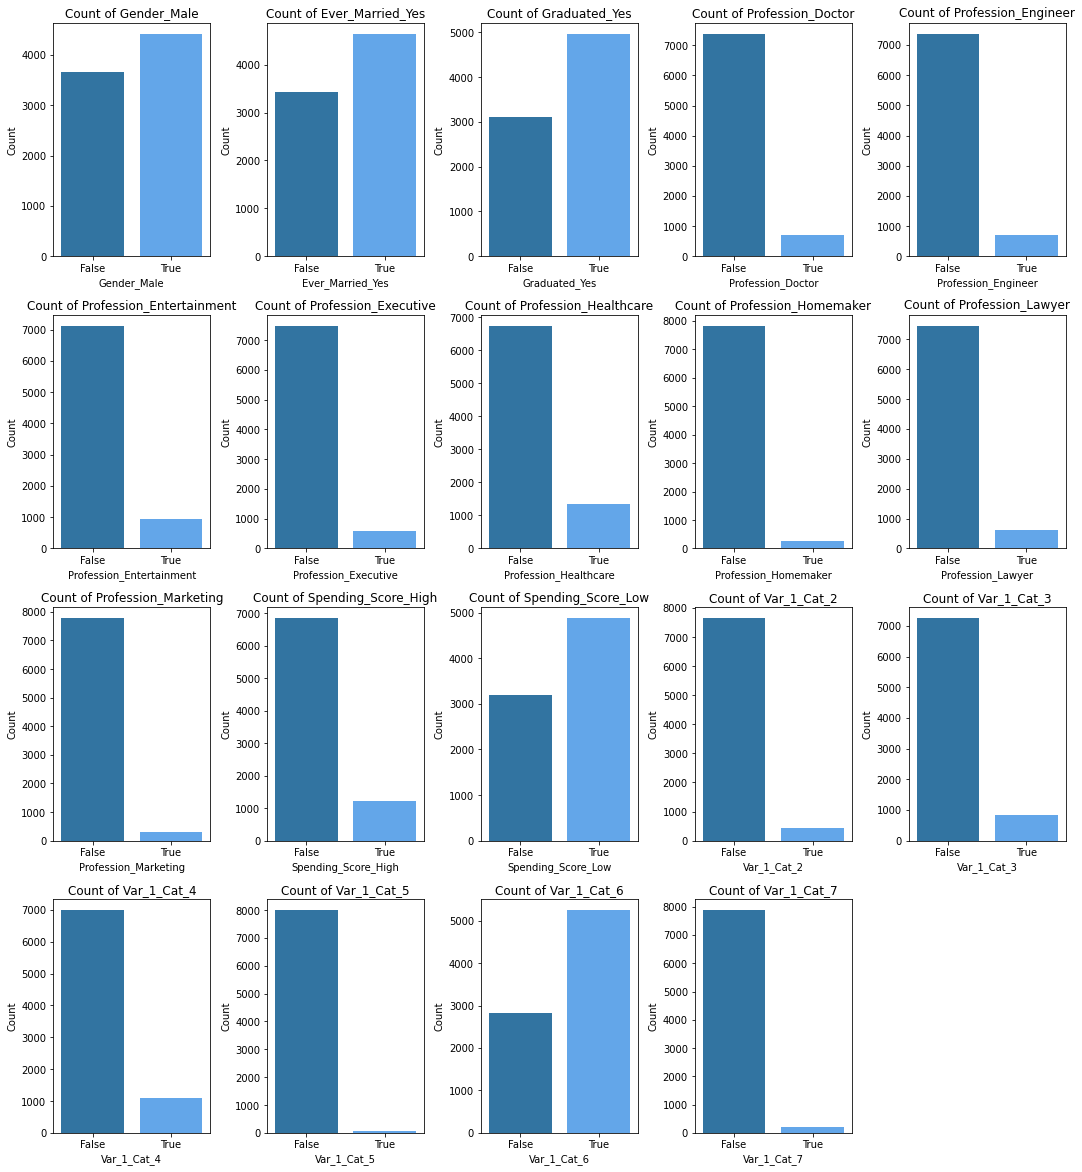

In [10]:
# Set the figure size for the plot layout
plt.figure(figsize=(15, 20))

# Define a blue color palette for consistency across all plots
blue_palette = ['#1f77b4', '#4da6ff']  

# Iterate through each boolean feature column in df_encoded
for i, column in enumerate(df_encoded.select_dtypes(include=[bool]).columns):
    # Create subplots in a grid layout, calculating the rows needed based on the total columns
    plt.subplot(((len(df_encoded.columns) // 5) + (len(df_encoded.columns) % 5 > 0)), 5, i + 1)  
    
    # Create a countplot for the current column using the blue palette
    sns.countplot(x=df_encoded[column], palette=blue_palette, hue=df_encoded[column], legend=False)
    
    # Set the title for each subplot based on the column name
    plt.title(f'Count of {column}')
    
    # Label the x-axis with the column name for clarity
    plt.xlabel(column)
    
    # Label the y-axis as 'Count' to indicate the frequency of True/False values
    plt.ylabel('Count')
    
    # Set custom x-ticks to display 'False' and 'True' instead of 0 and 1 for readability
    plt.xticks([0, 1], ['False', 'True'])  

# Adjust layout to prevent overlap and make plots fit well within the figure size
plt.tight_layout()
plt.show()


To see profession on unencoded dataset to show relative balance amongst profession in the dataset, except Artist seems to be more prominent.

=== Counts of Each Category in 'Profession' Column ===
Profession
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: count, dtype: int64

----------------------------------------



/tmp/ipykernel_12001/1536977401.py:25: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=column, data=data, palette=palette, hue=column)


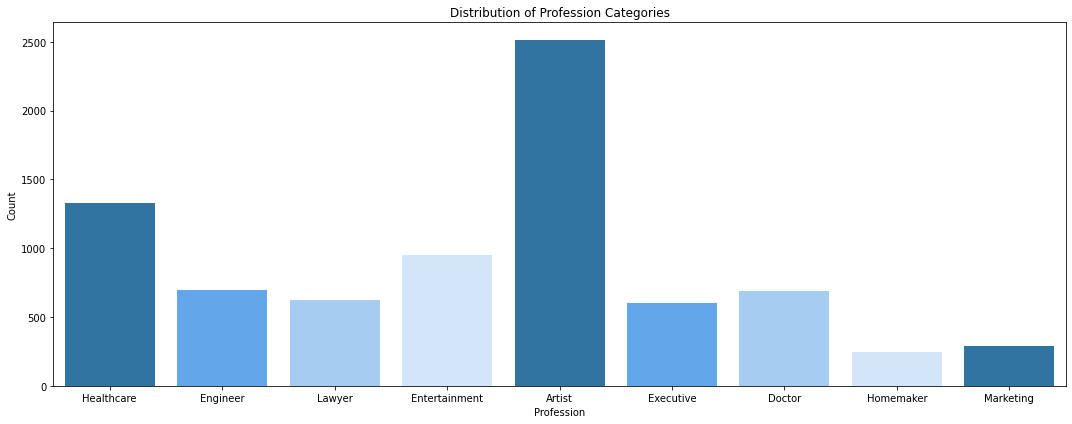

In [11]:
# Check for data imbalance by counting unique values in the 'Profession' column
print("=== Counts of Each Category in 'Profession' Column ===")
print(df_clean['Profession'].value_counts())
print("\n----------------------------------------\n")

# Define a function to create count plots for any categorical column
def plot_count_distribution(data, column, palette, title, xlabel, ylabel, figsize=(15, 6), rotation=0):
    """
    Creates a count plot for a specified column in a DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing the data
    - column (str): The name of the column to plot
    - palette (list): The color palette to use for the plot
    - title (str): Title of the plot
    - xlabel (str): Label for the x-axis
    - ylabel (str): Label for the y-axis
    - figsize (tuple): Size of the figure (width, height)
    - rotation (int): Degree of rotation for x-tick labels

    Returns:
    - None
    """
    plt.figure(figsize=figsize)
    sns.countplot(x=column, data=data, palette=palette, hue=column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.legend([], [], frameon=False)  # Hides redundant legend
    plt.tight_layout()
    plt.show()

# Set a blue color palette for the plot
blue_palette = ['#1f77b4', '#4da6ff', '#99ccff', '#cce5ff']

# Call the function to create a count plot for the 'Profession' column
plot_count_distribution(
    data=df_clean,
    column='Profession',
    palette=blue_palette,
    title='Distribution of Profession Categories',
    xlabel='Profession',
    ylabel='Count'
)


For the features that are non-boolean types, I will produce a pairplot followed by box plots to get a sense of their distribution.

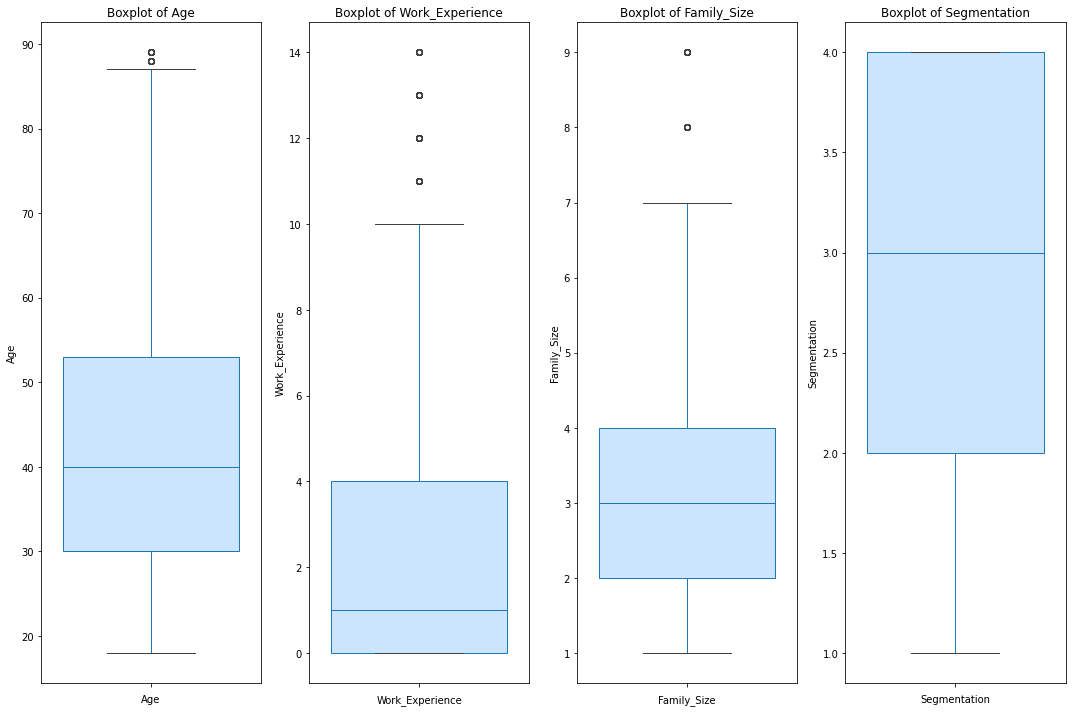

In [13]:
# Define a function to create horizontal boxplots for numeric features
def plot_horizontal_boxplots(data, color_whisker, color_box, color_median, figsize=(15, 10)):
    """
    Creates horizontal boxplots for all numeric columns in the DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing the data
    - color_whisker (str): Color for the whiskers
    - color_box (str): Color for the box (face and edge)
    - color_median (str): Color for the median line
    - figsize (tuple): Size of the figure (width, height)

    Returns:
    - None
    """
    # Set figure size
    plt.figure(figsize=figsize)
    
    # Identify numeric columns and iterate through each
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    for i, column in enumerate(numeric_columns):
        plt.subplot((len(numeric_columns) // 4) + (len(numeric_columns) % 4 > 0), 4, i + 1)  # Create subplots
        
        # Create a horizontal boxplot for the current column
        sns.boxplot(
            y=data[column],  # Horizontal orientation
            whiskerprops=dict(color=color_whisker),  # Customize whisker color
            boxprops=dict(facecolor=color_box, edgecolor=color_whisker),  # Customize box color
            medianprops=dict(color=color_median)  # Customize median line color
        )
        
        # Set title and labels
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)  # Label the x-axis with column name

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Set blue colors for the plot elements
plot_horizontal_boxplots(
    data=df_encoded,
    color_whisker='#1f77b4',  # Whisker color
    color_box='#cce5ff',      # Box color (fill)
    color_median='#1f77b4'    # Median line color
)


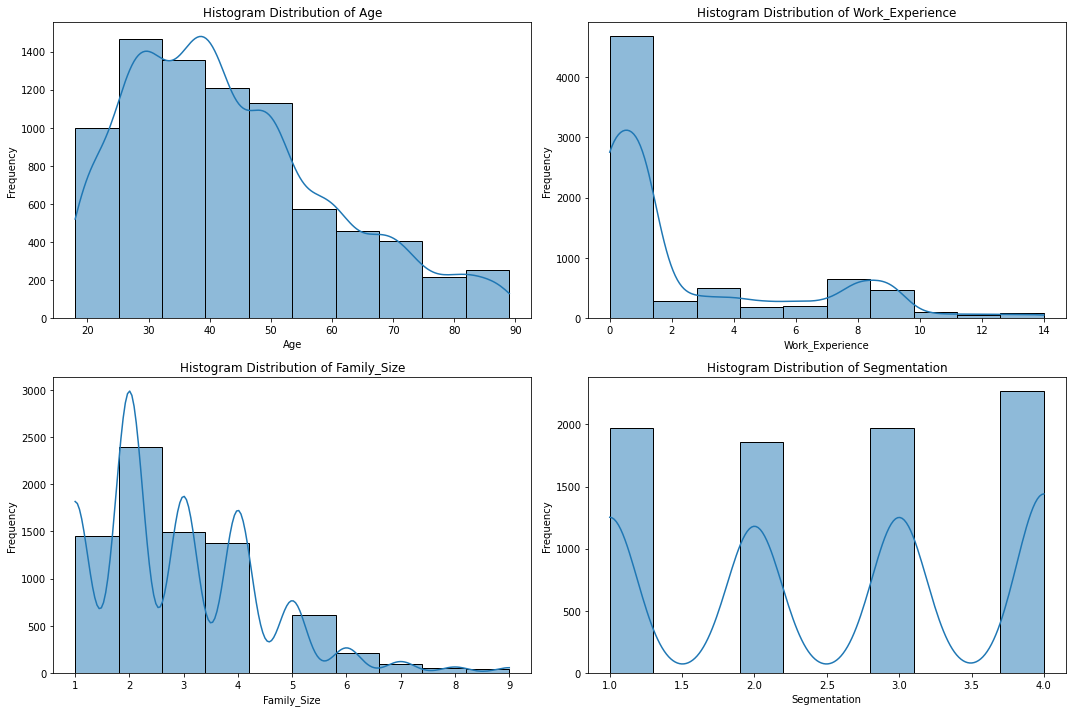

In [14]:
# Define a function to create histograms for numeric features
def plot_histograms(data, color, bins=10, figsize=(15, 10)):
    """
    Creates histograms with KDE for all numeric columns in the DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing the data
    - color (str): Color for the histogram bars and KDE line
    - bins (int): Number of bins for the histogram
    - figsize (tuple): Size of the figure (width, height)

    Returns:
    - None
    """
    # Set figure size
    plt.figure(figsize=figsize)
    
    # Identify numeric columns and iterate through each
    numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
    for i, column in enumerate(numeric_columns):
        plt.subplot((len(numeric_columns) // 2) + (len(numeric_columns) % 2 > 0), 2, i + 1)  # Create subplots
        
        # Create a histogram with KDE for the current column
        sns.histplot(
            x=data[column],
            bins=bins,
            kde=True,
            color=color  # Set color for the histogram and KDE
        )
        
        # Set title and labels
        plt.title(f'Histogram Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xlabel(column)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the function with blue color for histograms
plot_histograms(
    data=df_encoded,
    color='#1f77b4',  # Blue color for histogram bars
    bins=10,
    figsize=(15, 10)
)


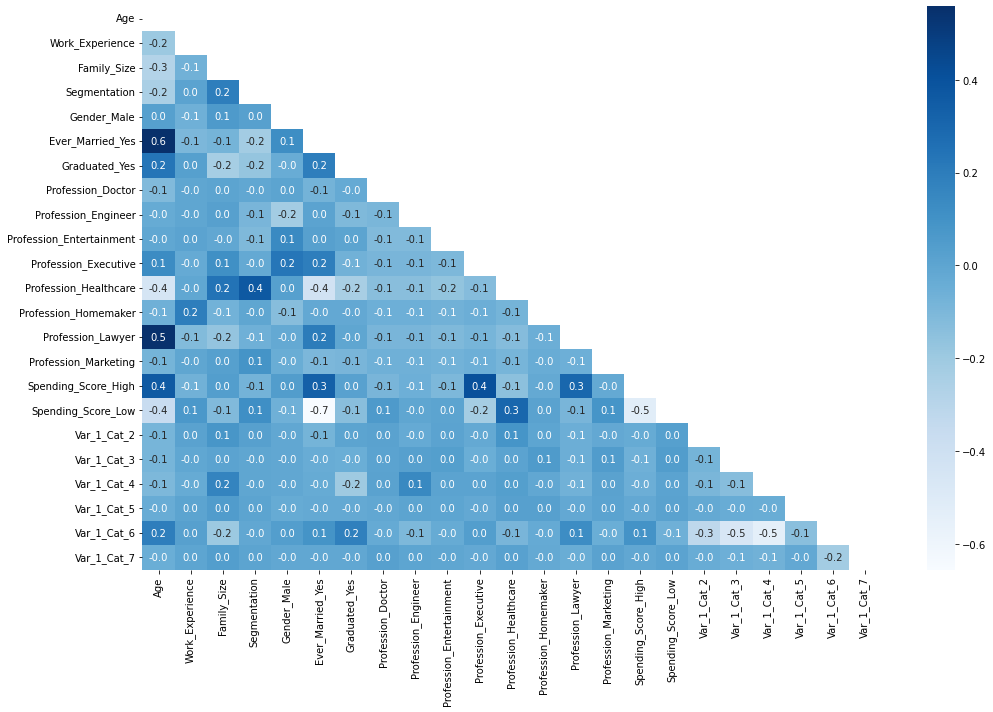

In [15]:
# Define a function to create a heatmap of the correlation matrix
def plot_correlation_heatmap(data, cmap="Blues", figsize=(15, 10), fmt=".1f"):
    """
    Creates a heatmap for the correlation matrix of a DataFrame.

    Parameters:
    - data (DataFrame): The DataFrame containing the data
    - cmap (str): Color palette for the heatmap
    - figsize (tuple): Size of the figure (width, height)
    - fmt (str): String format for annotations

    Returns:
    - None
    """
    # Calculate the correlation matrix
    correlation = data.corr()
    
    # Set figure size
    plt.figure(figsize=figsize)
    
    # Create a mask to hide the upper triangle (optional for cleaner visuals)
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    
    # Plot the heatmap with annotations
    sns.heatmap(
        correlation,
        annot=True,         # Display correlation values
        fmt=fmt,            # Format for annotation values
        cmap=cmap,          # Color palette
        mask=mask           # Mask the upper triangle
    )
    
    # Adjust layout for a clean fit
    plt.tight_layout()
    plt.show()

# Call the function to plot the correlation heatmap with a blue color palette
plot_correlation_heatmap(data=df_encoded, cmap="Blues", figsize=(15, 10), fmt=".1f")

## 5. Model

I have chosen to do 2 unsupervised and 5 supervised models. Specifically, the unsupervised models I chose to try was AggCluster and DBSCAN. While the unsupervised models I chose were from the final I did in ML1 include Logistic Regression, KNN, Decision Tree, Random Forest, and Support Vector. I made the effort to ensure each of the models were hyperparameter tuned with their respective available hyperparameters by leveraging GridSearchCV. I decided not to treat for imbalance as I discovered the 4 segments were relatively balanced in the EDA step. For the unsupervised learning methods, I needed a way to get the models accuracy based on ground truth labels. I wanted to explore an alternative method to permutations. I found an interesting method online and leveraged a piece of code (sourced below). The code leverages the scipy library to optimize mapping the discovered segments with the ground truth labels. Once that mapping was done, we can then measure the accuracy of each unsupervised model. This way, I am able to compare against the supervised learning methods I chosen.

### 5.1 Unsupervised Models

In [16]:
# Convert all boolean columns in df_encoded to integers
df_encoded[df_encoded.select_dtypes(include=[bool]).columns] = df_encoded[df_encoded.select_dtypes(include=[bool]).columns].astype(int)

# Display the DataFrame to confirm boolean columns are converted to integers
df_encoded


,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,38,NaN,3.0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,2,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,67,0.0,2.0,2,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,40,NaN,6.0,1,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8064,35,3.0,4.0,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8065,33,1.0,1.0,4,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8066,27,1.0,4.0,2,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


Unsupervised Learning Set-up

In [23]:
# Convert boolean columns to integer form (1 for True, 0 for False) for model compatibility
df_encoded[df_encoded.select_dtypes(include=[bool]).columns] = df_encoded[df_encoded.select_dtypes(include=[bool]).columns].astype(int)

# Split dataset: 80% for training and 20% for testing
# For unsupervised learning, we drop the label column from X to train without labels and use y for testing accuracy
X = df_encoded.drop(columns=['Segmentation'])  # Features without labels
y = df_encoded['Segmentation']  # True labels for later evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler for consistent range and improved model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using training fit

# Helper function to reassign predicted labels from clustering to match true labels
# Source: https://docs.neurodata.io/notebooks/pedigo/graspologic/clustering/2020/10/12/remapping-labels.html
def reassign_labels(true_labels, pred_labels, return_map=False):
    """
    Reassign predicted labels to match the ground truth labels for accurate evaluation.
    
    Parameters:
    - true_labels (array-like): The actual labels for the data
    - pred_labels (array-like): The predicted labels from the clustering algorithm
    - return_map (bool): If True, returns the mapping used for reassignment
    
    Returns:
    - reassigned_labels (array-like): The predicted labels reassigned to match the ground truth
    - mapping (dict, optional): The mapping from predicted to true labels if return_map is True
    """
    # Generate a confusion matrix to align clusters with true labels
    cm = confusion_matrix(true_labels, pred_labels)
    
    # Apply linear sum assignment to find the best mapping of clusters to labels
    row_idx, col_idx = linear_sum_assignment(cm, maximize=True)
    
    # Create a mapping from predicted labels to actual labels
    mapping = {col_idx[i]: row_idx[i] for i in range(len(col_idx))}
    
    # Reassign predicted labels based on the optimal mapping
    reassigned_labels = np.vectorize(mapping.get)(pred_labels)

    # Optionally return the mapping used
    if return_map:
        return reassigned_labels, mapping
    else:
        return reassigned_labels

# Helper function to assess model accuracy after label reassignment
# Used in conjunction with GridSearchCV for hyperparameter tuning
def acc_score(temp_model, X, y):
    """
    Calculate the accuracy score of a clustering model by reassigning labels to match true labels.

    Parameters:
    - temp_model (model object): The clustering model to fit and predict
    - X (array-like): The feature data to fit and predict
    - y (array-like): The true labels for comparison

    Returns:
    - accuracy (float): The accuracy score after label reassignment
    """
    # Fit the model and predict labels
    pred_labels = temp_model.fit_predict(X)
    
    # Reassign predicted labels to align with true labels for accurate scoring
    reassigned_labels = reassign_labels(y, pred_labels)
    
    # Calculate accuracy based on reassigned labels
    return accuracy_score(y, reassigned_labels)


#### 5.1.1 Unsupervised Model 1: Agglomerative Cluster

In [25]:
from sklearn.impute import SimpleImputer

# Check for any missing values
if np.isnan(X_train_scaled).any() or np.isnan(X_test_scaled).any():
    print("Missing values detected. Imputing missing values...")

    # Initialize SimpleImputer to fill missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    
    # Fit and transform the imputer on training data and transform test data
    X_train_scaled = imputer.fit_transform(X_train_scaled)
    X_test_scaled = imputer.transform(X_test_scaled)

# Proceed with GridSearchCV as before
grid_search = GridSearchCV(
    estimator=AgglomerativeClustering(),
    param_grid=agg_params,
    scoring=acc_score,
    cv=5
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print results
print(f'Best Agglomerative Clustering parameters: {best_params}')
print(f'Best Agglomerative Clustering accuracy: {best_accuracy}')


Missing values detected. Imputing missing values...
Best Agglomerative Clustering parameters: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 4}
Best Agglomerative Clustering accuracy: 0.33390377028804064


#### 5.1.2 Unsupervised Model 2: DBSCAN

In [29]:
# initialize parameters for AggCluster to cycle through leveraging GridSearchCV
# Initialize parameters for Agglomerative Clustering with fixed n_clusters
dbscan_params = {
    'eps': [0.3, 0.5, 0.7],  # Example values, adjust as necessary
    'min_samples': [5, 10, 15]
}

# initialize GridSearchCV and wrap it around the parameters initialized above with the
# helper acc score function
grid_search = GridSearchCV(
    DBSCAN(),
    param_grid=dbscan_params,
    scoring=acc_score,
    cv=5
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print results
print(f'Best DBSCAN parameters: {best_params}')
print(f'Best DBSCAN acc: {best_accuracy}')

Best DBSCAN parameters: {'eps': 0.3, 'min_samples': 10}
Best DBSCAN acc: 0.30117564105494704


### 5.2 Supervised Models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

# Dictionary of models with their initialized parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector': SVC(probability=True),
}

# Parameter grid for GridSearchCV to test and optimize each model
parameters = {
    'Logistic Regression': {'C': [0.1, 0.5, 1, 5, 50]},
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15, 20, 25, 30]},
    'Random Forest': {'n_estimators': [25, 50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'Support Vector': {'C': [0.1, 1, 50], 'kernel': ['linear', 'rbf', 'poly']},
}

# Initialize dictionary to store results for each model
model_results = {}

# Loop through each model and its parameters
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=parameters[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    # Retrieve the best model and parameters from GridSearchCV
    best_model = grid_search.best_estimator_
    print(f"{model_name} completed with best parameters: {grid_search.best_params_}")
    
    # Determine if Recursive Feature Elimination (RFE) is applicable
    if hasattr(best_model, "coef_") or hasattr(best_model, "feature_importances_"):
        # Apply RFE to reduce multicollinearity
        rfe = RFE(estimator=best_model, n_features_to_select=8)
        X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
        X_test_rfe = rfe.transform(X_test_scaled)
        features = X.columns[rfe.support_].tolist()
        
        # Train and predict using the reduced features
        best_model.fit(X_train_rfe, y_train)
        y_hat = best_model.predict(X_test_rfe)
        y_prob = best_model.predict_proba(X_test_rfe)[:, 1]
    else:
        # Train and predict without RFE
        best_model.fit(X_train_scaled, y_train)
        y_hat = best_model.predict(X_test_scaled)
        y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
        features = X.columns.tolist()
    
    # Calculate and display accuracy and classification report
    acc = accuracy_score(y_test, y_hat)
    print(f"Accuracy for {model_name}: {acc:.4f}")
    clf_report = classification_report(y_test, y_hat)
    
    # Perform cross-validation and calculate the mean score
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
    cv_mean = cv_scores.mean()
    print(f"Cross-validation score (mean) for {model_name}: {cv_mean:.4f}")
    
    # Store results in dictionary for sorting and comparison
    model_results[model_name] = {
        'model': best_model,
        'acc': acc,
        'clf': clf_report,
        'cv_mean': cv_mean,
        'features': features
    }

# Sort models based on cross-validation mean accuracy score
sorted_model_results = sorted(model_results.items(), key=lambda item: item[1]['cv_mean'], reverse=True)
print("Models sorted by Cross-Validation Mean Score:")
for model_name, result in sorted_model_results:
    print(f"{model_name}: CV Mean Score = {result['cv_mean']:.4f}")


Training model: Logistic Regression
Logistic Regression completed best with parameters: {'C': 50}
Accuracy for Logistic Regression: 0.4951
Completed clf report for Logistic Regression
Completed cv score for Logistic Regression: 0.5148
Completed training model: Logistic Regression

Training model: KNN
KNN completed best with parameters: {'n_neighbors': 9}
Accuracy for KNN: 0.4944
Completed clf report for KNN
Completed cv score for KNN: 0.4717
Completed training model: KNN

Training model: Decision Tree
Decision Tree completed best with parameters: {'max_depth': 5}
Accuracy for Decision Tree: 0.4974
Completed clf report for Decision Tree
Completed cv score for Decision Tree: 0.4293
Completed training model: Decision Tree

Training model: Random Forest
Random Forest completed best with parameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy for Random Forest: 0.4936
Completed clf report for Random Forest
Completed cv score for Random Forest: 0.4863
Completed training model: Random Fo

In [27]:
# Now that each model has been trained and results are stored in model_results,
# we will extract and display the results to analyze and choose the best model.

width = 60  # Set width for centered output formatting

# Loop through each model and its results in sorted order
for model, result in sorted_model_results:
    # Print the model name in bold and centered
    print(f"\033[1m{model + ':' :^{width}}\033[0m")
    
    # Print the Cross Validation Mean Accuracy, centered
    print(f"\n{'Cross Validation Mean Accuracy: ' + f'{result['cv_mean']:.2f}' :^{width}}")
    
    # Print the classification report for each model
    print(f"{result['clf']}\n")
    
    # Display the selected features, centered
    print(f"Selected features: {result['features']}\n")

                      Support Vector:                       

            Cross Validation Mean Accuracy: 0.53            
              precision    recall  f1-score   support

           1       0.40      0.46      0.43       315
           2       0.39      0.34      0.37       302
           3       0.58      0.52      0.55       346
           4       0.64      0.68      0.66       370

    accuracy                           0.51      1333
   macro avg       0.50      0.50      0.50      1333
weighted avg       0.51      0.51      0.51      1333


Selected features: ['Age', 'Work_Experience', 'Family_Size', 'Gender_Male', 'Ever_Married_Yes', 'Graduated_Yes', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']

  

### 6. Results and Analsyis

Based on the **results summary** provided, hyperparameter tuning in unsupervised learning with GridSearchCV yielded an accuracy of 0.34 for the Agglomerative Clustering (AggCluster) model and 0.30 for DBSCAN. While these scores were relatively low, running the data through supervised learning models significantly improved accuracy, with both Support Vector Machines (SVM) and Logistic Regression achieving an accuracy of 0.51. In addition to accuracy, I also evaluated supervised models using precision, recall, f1-score, and cross-validation mean. Each model underwent thorough hyperparameter tuning to maximize accuracy before finalizing. For instance, AggCluster was tuned based on linkage and metric options, while the Logistic Regression model was optimized across five different `C` levels.

Before training the models, I hypothesized which features might most effectively segment the data. I believed that variables such as profession, spending habits, age, gender, and marital status would be influential in customer segmentation. Results from the supervised learning models supported this hypothesis, with these features contributing notably to model accuracy. Interestingly, the `val_1` column also played a role in segmentation accuracy, which I had not initially anticipated.

**Reasons for the better performance of supervised learning methods over unsupervised methods** include differences in model complexity, task type, and cluster interpretability. Supervised learning models, like Logistic Regression and SVM, are generally more suited to classification due to their design for linear and non-linear decision boundaries, respectively, providing flexibility in learning patterns. Additionally, the nature of the task is a key factor; supervised models trained on labeled data are more accurate for predictive tasks when labels are available. In contrast, unsupervised learning models, which rely solely on identifying inherent data patterns, may not align as effectively with true classes due to a lack of label guidance. This misalignment between clusters and actual classes often results in lower accuracy for unsupervised methods. 


|Model|Type|Accuracy|
|:-|:-|:-|
|AgglomerativeClustering|Unsupervised|0.34|
|DBSCAN|Unsupervised|0.30|
|Support Vector|Supervised|0.51|
|Logistic Regression|Supervised|0.51|
|Decision Tree|Supervised|0.50|
|Random Forest|Supervised|0.49|
|KNN|Supervised|0.47|

### 7. Discussion and Conclusion

**Reflection on Learning and Key Insights:**

After processing and exploring the dataset through cleaning and exploratory data analysis (EDA), I was eager to build both unsupervised and supervised models to compare their performance. Initially, I expected an accuracy above 0.90, given the straightforward nature of the data. Surprisingly, unsupervised methods struggled to surpass 40% accuracy, while supervised methods remained around 60%. This experience highlighted that achieving accuracy above 0.80 is not always feasible, and it’s important to set realistic expectations. For instance, in the context of customer segmentation, even an accuracy range of 30-50% offers more targeted insights than random guessing, aiding in better allocation of marketing resources.

One key takeaway from this project was learning to use the `linear_sum_assignment` function to align unsupervised model results with ground truth labels, enabling a fair comparison with supervised methods. Although silhouette scores are a common metric for unsupervised models, they do not allow a direct comparison with supervised accuracy metrics. Aligning labels with `linear_sum_assignment` provided a clear basis for comparison.

**Challenges and Solutions:**

Initially, finding an effective way to evaluate unsupervised learning accuracy was challenging. My first approach involved testing all label permutations to find the optimal alignment, but this proved too time-consuming. Seeking a more efficient solution, I discovered the `scipy.optimize` library, which allowed me to map predicted labels to true labels using a method inspired by neurodata.io. This approach enabled a direct comparison between unsupervised and supervised learning methods.

**Suggestions for Model Improvement:**

To potentially enhance model performance, several adjustments could be made. Removing outliers from the dataset may help refine accuracy, as would using label encoding instead of one-hot encoding (`get_dummies`). Additionally, feature engineering could further improve results. For instance, creating combined features for high-spending, married individuals might boost both unsupervised and supervised model accuracy. Lastly, balancing the dataset by reducing instances of the *Artist* occupation could provide a more equitable distribution for the profession feature, likely enhancing segmentation accuracy.

### 8. GitHub Repository

GitHub repository link: https://github.com/Bob-cmu/Unsupervised-Learning

### 9. References:
[1] https://www.analyticsvidhya.com/datahack/contest/janatahack-customer-segmentation/#ProblemStatement<br/>
[2] https://docs.neurodata.io/notebooks/pedigo/graspologic/clustering/2020/10/12/remapping-labels.html<br/>
[3] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html<br/>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br/>
[5] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html<br/>
[6] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html<br/>
[7] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html<br/>
[8] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br/>
[9] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html<br/>
[10]https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br/>
[11] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html<br/>
[12] https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html<br/>
[13] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br/>
[14] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html<br/>
[15] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br/>
[16] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html<br/>
[17] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html<br/>
[18] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html<br/>
[19] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html<br/>
[20] https://scikit-learn.org/stable/modules/generated/sklearn.base.clone.html<br/>
[21] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree<br/>
[22] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br/>
[23] https://cran.r-project.org/web/packages/summarytools/summarytools.pdf<br/>
[24] https://scikit-learn.org/stable/modules/model_evaluation.html<br/>
[25] https://www.kaggle.com/datasets/vetrirah/customer/data<br/>
[26] https://github.com/Ofleitman/ML2_Final/tree/main<br/>
[27] https://pandas.pydata.org/pandas-docs/stable/<br/>
[28] https://matplotlib.org/stable/contents.html<br/>
[29] https://imbalanced-learn.org/stable/<br/>
[30] https://docs.scipy.org/doc/scipy/<br/>
[31] https://scikit-learn.org/stable/<br/>
[32] https://numpy.org/doc/stable/<br/>
[33] https://seaborn.pydata.org/<br/>
